<a href="https://colab.research.google.com/github/PalakAggarwal13/ML_Projects/blob/main/Project_8_GoldPricePrediction/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
from google.colab import files
uploaded = files.upload()

Saving archive (4).zip to archive (4).zip


In [5]:
import zipfile

with zipfile.ZipFile('archive (4).zip','r') as zip_ref:
  zip_ref.extractall('Gold_Status')

import os
print(os.listdir('Gold_Status'))

['gld_price_data.csv']


In [7]:
df = pd.read_csv('Gold_Status/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
df.shape

(2290, 6)

In [13]:
correlation = df.drop(['Date'],axis=1).corr()

<Axes: >

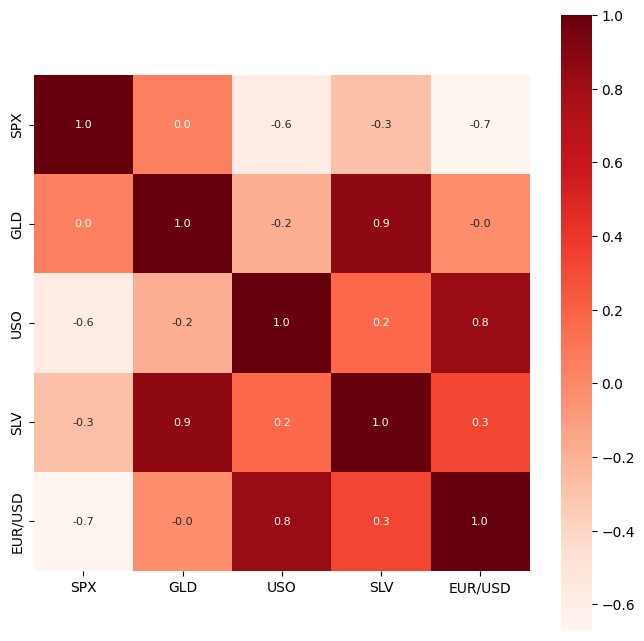

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation , cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

In [16]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-17-2544004133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

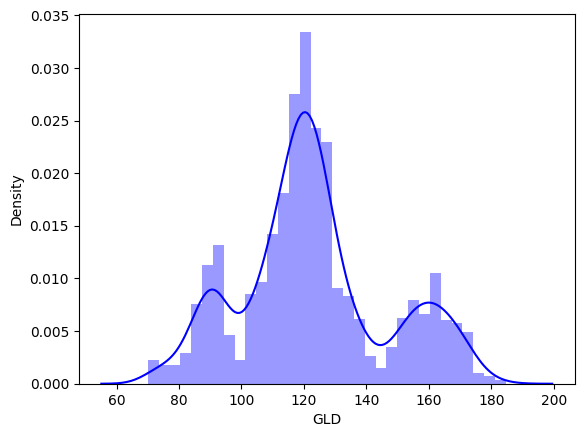

In [17]:
sns.distplot(df['GLD'],color='blue')

In [18]:
X = df.drop(['Date','GLD'] , axis=1)
Y = df['GLD']

In [19]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

In [24]:
model = RandomForestRegressor(n_estimators=100)

In [27]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [28]:
train_preds = model.predict(X_train)

In [29]:
error_score = metrics.r2_score(Y_train,train_preds)
print(error_score)

0.9983977200443177


In [30]:
test_preds = model.predict(X_test)

In [32]:
test_error_score = metrics.r2_score(Y_test,test_preds)
print(test_error_score)

0.9931511356797161


In [43]:
Y_test = list(Y_test)

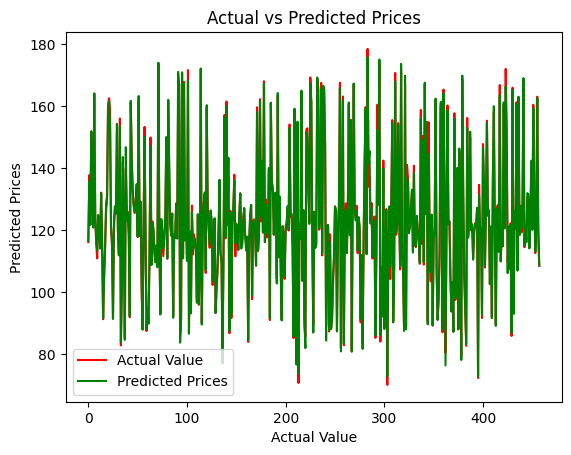

In [44]:
plt.plot(Y_test , color='red' , label='Actual Value')
plt.plot(test_preds , color='green' , label='Predicted Prices')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()